<a href="https://colab.research.google.com/github/micah-shull/loan_defaults/blob/main/loan_defaults_001_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis

To explore and visualize your loan default data, you can break down the process into the following steps. This strategy focuses on understanding the distribution, relationships, and key patterns within both categorical and numeric features. Here’s a structured approach:

### 1. **Understand the Data Structure**
   - **Inspect Data Types:** Identify which features are categorical and which are numeric. This will help decide the appropriate visualizations and analyses.
   - **Check for Missing Values:** Look for missing data and determine whether you need to fill, drop, or otherwise handle these missing values.
   - **Check for Duplicates:** Identify and handle any duplicate records if necessary.

### 2. **Distribution of Features**
   - **Univariate Analysis:**
     - For numeric features: Plot histograms, boxplots, and KDE plots to understand the distribution, outliers, and skewness.
     - For categorical features: Use bar plots or count plots to see the frequency distribution of each category.

### 3. **Explore Relationships Between Features**
   - **Bivariate Analysis:**
     - Numeric vs Numeric: Use scatter plots or pair plots (seaborn’s `pairplot`) to examine relationships between numeric features.
     - Categorical vs Numeric: Use box plots or violin plots to understand how numeric features vary across different categories.
     - Categorical vs Categorical: Use stacked bar charts or heatmaps to explore relationships between categorical features.

### 4. **Analyze Correlations**
   - **Correlation Matrix:** Compute and visualize the correlation matrix for numeric features using a heatmap. Pay attention to multicollinearity and strong correlations.
   - **Correlation with the Target Variable:** Focus on identifying features that are strongly correlated with the target variable (e.g., loan default status). This will guide feature selection.

### 5. **Outliers and Anomalies**
   - **Boxplots and Z-Scores:** Use boxplots and calculate Z-scores to detect and visualize outliers in numeric features.
   - **Targeted Outlier Detection:** Focus on outliers in features that are critical for predicting loan defaults.

### 6. **Target Variable Distribution**
   - **Class Balance:** If the target is binary (e.g., default/no default), plot the class distribution using a count plot or pie chart to assess class imbalance.

### 7. **Feature Interactions and Grouping**
   - **Interaction Plots:** For combinations of categorical features or combinations of categorical and numeric features, use interaction plots or grouped box plots.
   - **Pivot Tables or Grouped Aggregations:** Summarize numeric data by categories to observe trends, such as mean or median loan balances across different education levels.

### 8. **Feature Engineering Insights**
   - Identify potential new features based on the EDA results, such as ratios, binning numeric features, or interaction terms (e.g., combining income with payment history).

### 9. **Dimensionality Reduction (Optional for Visualization)**
   - **PCA or t-SNE:** Reduce the dimensionality of numeric data to visualize patterns and clusters. This can help in understanding the structure of the dataset.

### 10. **Final Summary and Reporting**
   - Summarize your findings, noting key patterns, correlations, and potential challenges like multicollinearity, outliers, or class imbalance.
   - Decide on the preprocessing steps needed based on your analysis (e.g., transformations, scaling, encoding).

### Visualization Summary:
- **Histograms, Boxplots, KDE Plots:** For distribution of numeric data.
- **Count Plots, Bar Plots:** For categorical data.
- **Scatter Plots, Pair Plots:** For numeric feature interactions.
- **Heatmaps:** For correlation analysis.
- **Class Balance Plots:** For target distribution.
- **Interaction Plots:** For combinations of categorical and numeric features.



### Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.


url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


##Load & Preprocess



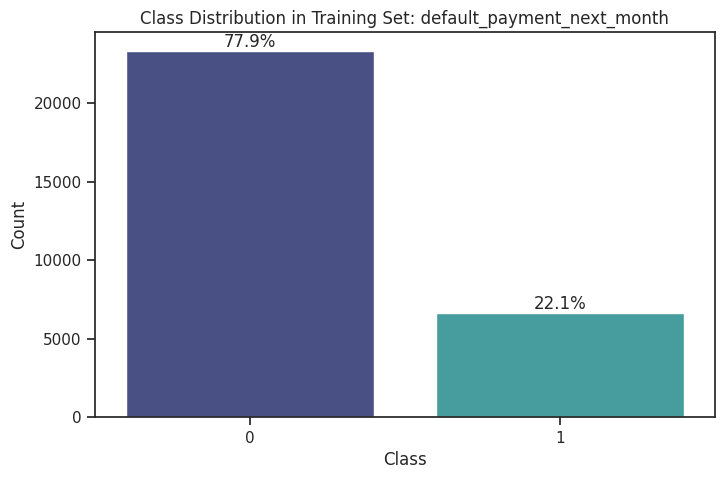

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import load_and_preprocess_data
from eda_utils import data_overview, plot_class_distribution, plot_univariate_distributions

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# plot class distribution
plot_class_distribution(y, target)

### 1. **Understand the Data Structure**
   - **Inspect Data Types:** Identify which features are categorical and which are numeric. This will help decide the appropriate visualizations and analyses.
   - **Check for Missing Values:** Look for missing data and determine whether you need to fill, drop, or otherwise handle these missing values.
   - **Check for Duplicates:** Identify and handle any duplicate records if necessary.

In [2]:
# print data overview
data_overview(X)

# Drop duplicate rows
X = X.drop_duplicates()

# Confirm the duplicates are removed
print(f"Number of Duplicate Rows After Dropping: {X.duplicated().sum()}")

Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 56

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   bill_amt_4_april      30000 non-null  int64   
 1   bill_amt_5_may        30000 non-null  int64   
 2   bill_amt_6_june       30000 non-null  int64   
 3   bill_amt_7_july       30000 non-null  int64   
 4   bill_amt_8_august     30000 non-null  int64   
 5   bill_amt_9_september  30000 non-null  int64   
 6   pay_amt_4_april       30000 non-null  int64   
 7   pay_amt_5_may         30000 non-null  int64   
 8   pay_amt_6_june        30000 non-null  int64   
 9   pay_amt_7_july        30000 non-null  int64   
 10  pay_amt_8_august      30000 non-null  int64   
 11  pay_amt_9_september   30000 non-null  int64   
 12  limit_bal             30000 non-null  int64   
 13  sex                   30000 non-nu

## Data Clean & Preprocess

Here’s a brief description of the preprocessing steps we need to take before diving into EDA:

---

### Data Preprocessing Steps

1. **Reorder the Bill and Payment Features**:
   - The `BILL_AMT` and `PAY_AMT` features are currently listed in reverse chronological order (September 2005 to April 2005). We will reorder these columns to match the actual timeline from April 2005 to September 2005, making the feature names align with the chronological order.

2. **Convert Categorical Variables to Human-Readable Text**:
   - The categorical variables such as `SEX`, `EDUCATION`, and `MARRIAGE` are currently represented by numeric codes (e.g., 1, 2, 3). We will convert these codes to their corresponding text labels for better interpretability during analysis:
     - `SEX`: Convert 1 to "Male" and 2 to "Female".
     - `EDUCATION`: Convert the numeric codes to "Graduate School", "University", "High School", etc.
     - `MARRIAGE`: Convert the numeric codes to "Married", "Single", etc.

3. **Remove the `ID` Column**:
   - The `ID` column is simply an identifier and does not provide useful information for analysis. We will drop this column from the dataset.

4. **Handle Missing Values**:
   - Although the dataset doesn’t seem to have missing values, we’ll confirm this during preprocessing. If any missing values are detected, we’ll decide how to handle them (e.g., imputation or removal).

5. **Check for and Remove Duplicates**:
   - We already identified and removed 56 duplicate rows earlier. We’ll confirm that the dataset is free from duplicates after the reordering and conversion steps.

6. **Standardize Column Names**:
   - To maintain consistency, we’ll ensure that all column names are lowercase and follow a consistent naming convention (e.g., `limit_bal`, `sex`, `education`, etc.).

These preprocessing steps will prepare the data for effective exploratory data analysis and subsequent model building.

---

This description outlines the key preprocessing tasks we need to address before moving forward. Let me know if you’d like me to implement these steps in code!

In [ ]:
def rename_bill_and_payment_columns(X):
    # Define the new names for the bill_amt columns with month number and name
    bill_amt_new_names = {
        'bill_amt1': 'bill_amt_9_september',
        'bill_amt2': 'bill_amt_8_august',
        'bill_amt3': 'bill_amt_7_july',
        'bill_amt4': 'bill_amt_6_june',
        'bill_amt5': 'bill_amt_5_may',
        'bill_amt6': 'bill_amt_4_april'
    }

    # Define the new names for the pay_amt columns with month number and name
    pay_amt_new_names = {
        'pay_amt1': 'pay_amt_9_september',
        'pay_amt2': 'pay_amt_8_august',
        'pay_amt3': 'pay_amt_7_july',
        'pay_amt4': 'pay_amt_6_june',
        'pay_amt5': 'pay_amt_5_may',
        'pay_amt6': 'pay_amt_4_april'
    }

    # Rename the columns
    X = X.rename(columns={**bill_amt_new_names, **pay_amt_new_names})

    return X

# Apply the renaming function
X = rename_bill_and_payment_columns(X)

# Display the updated column names
print(X.columns)


### 2. **Distribution of Features**
   - **Univariate Analysis:**
     - For numeric features: Plot histograms, boxplots, and KDE plots to understand the distribution, outliers, and skewness.
     - For categorical features: Use bar plots or count plots to see the frequency distribution of each category.


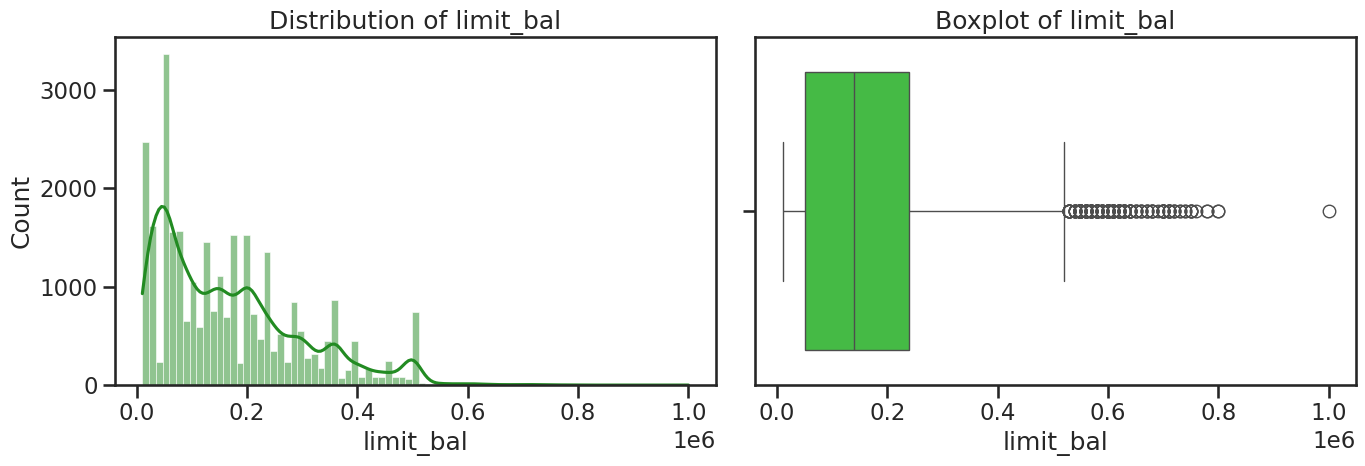

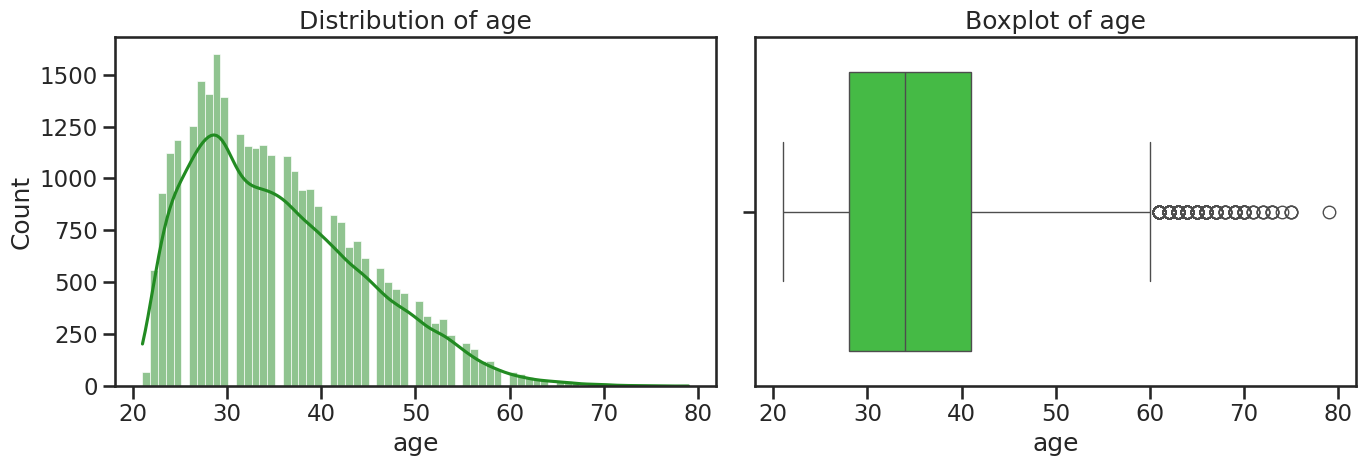

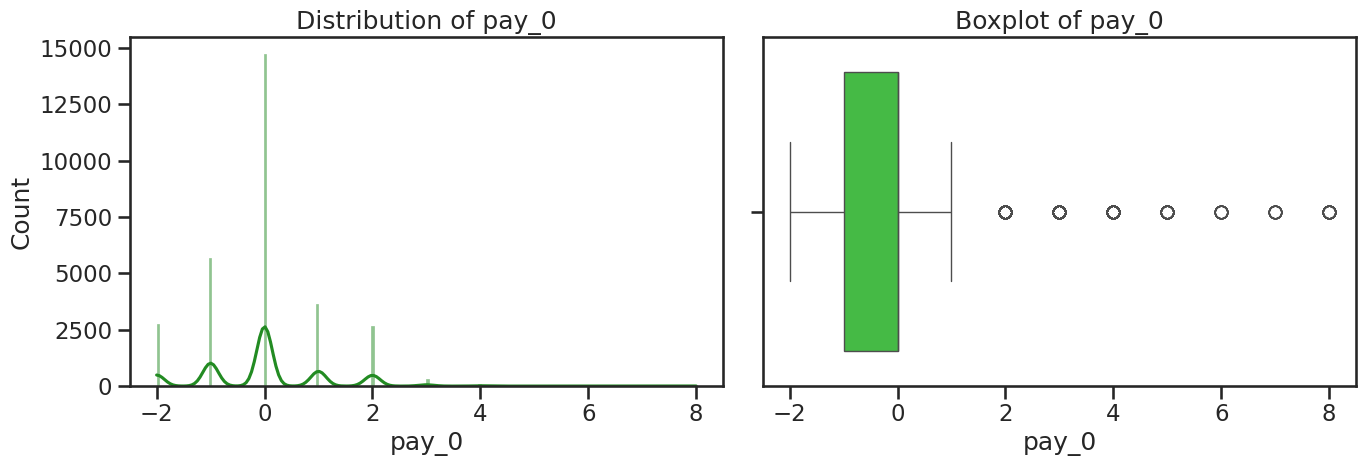

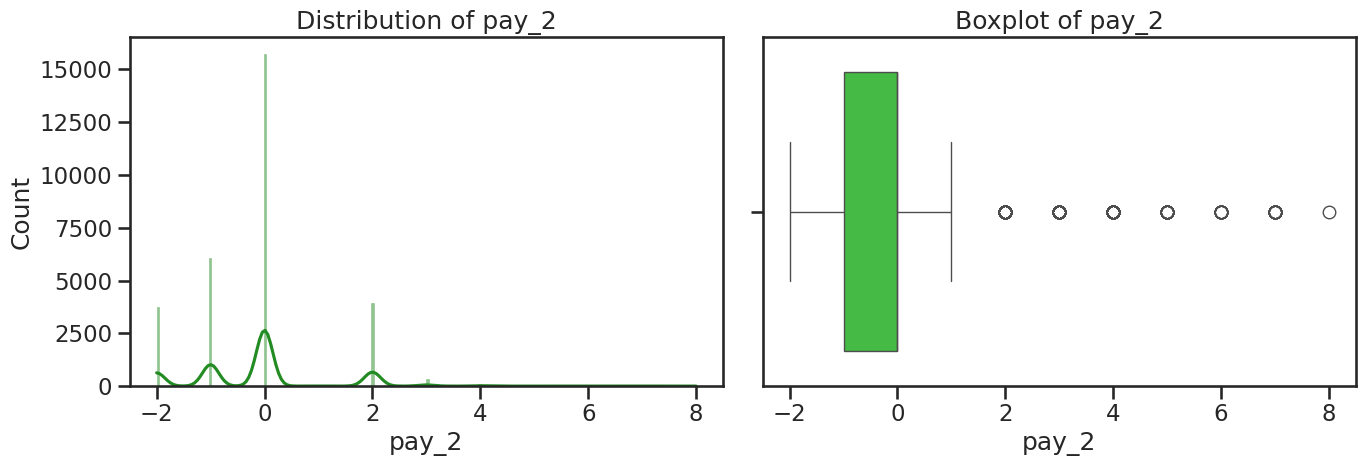

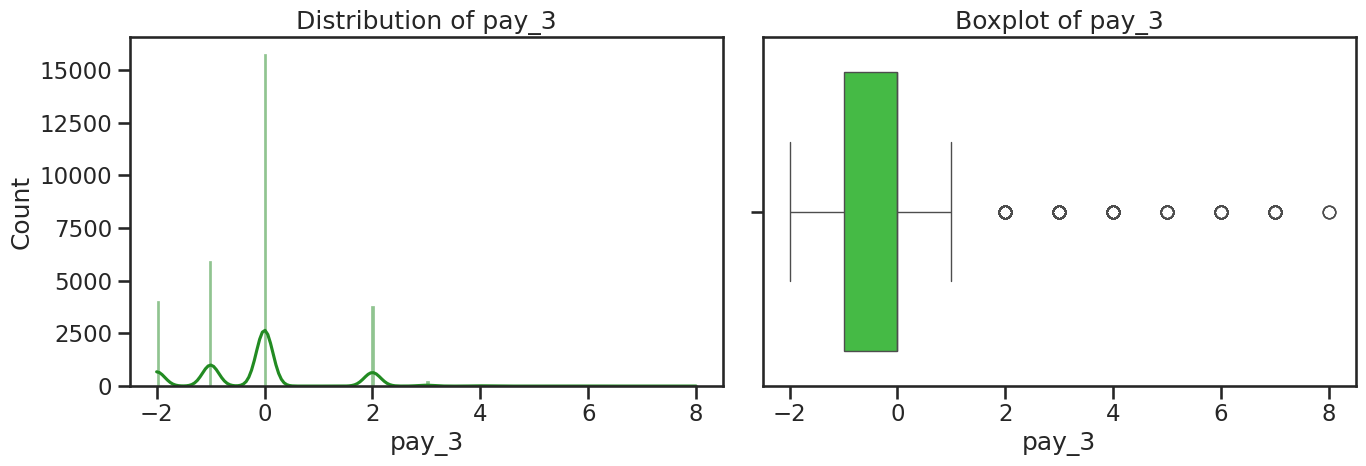

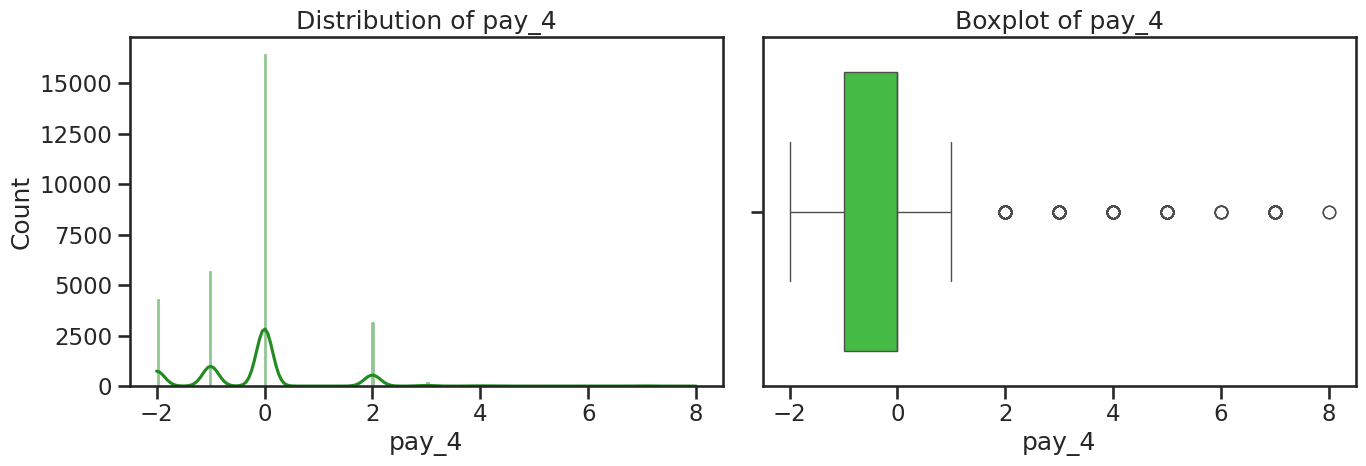

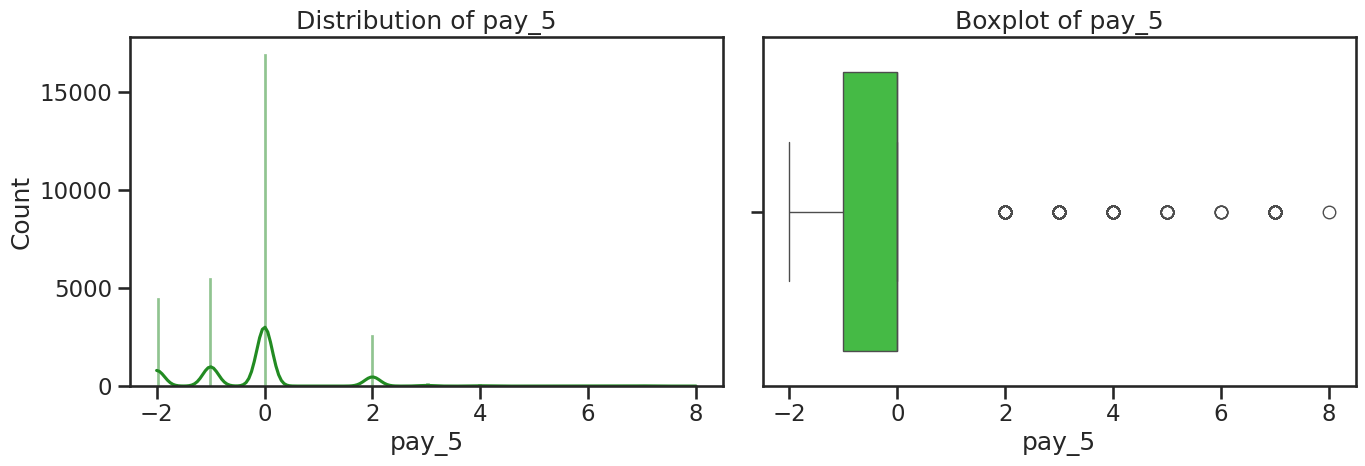

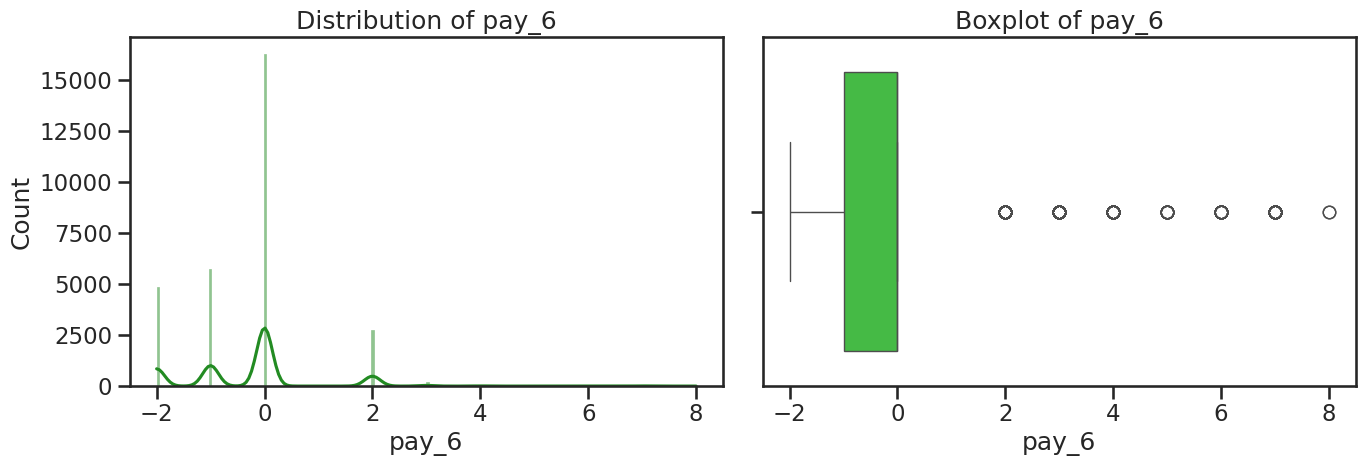

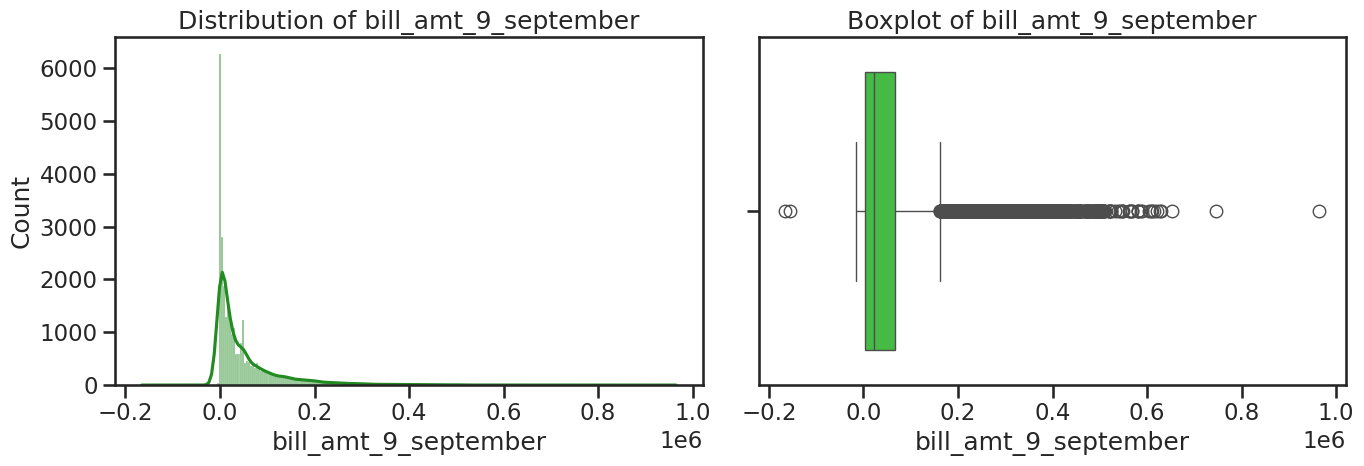

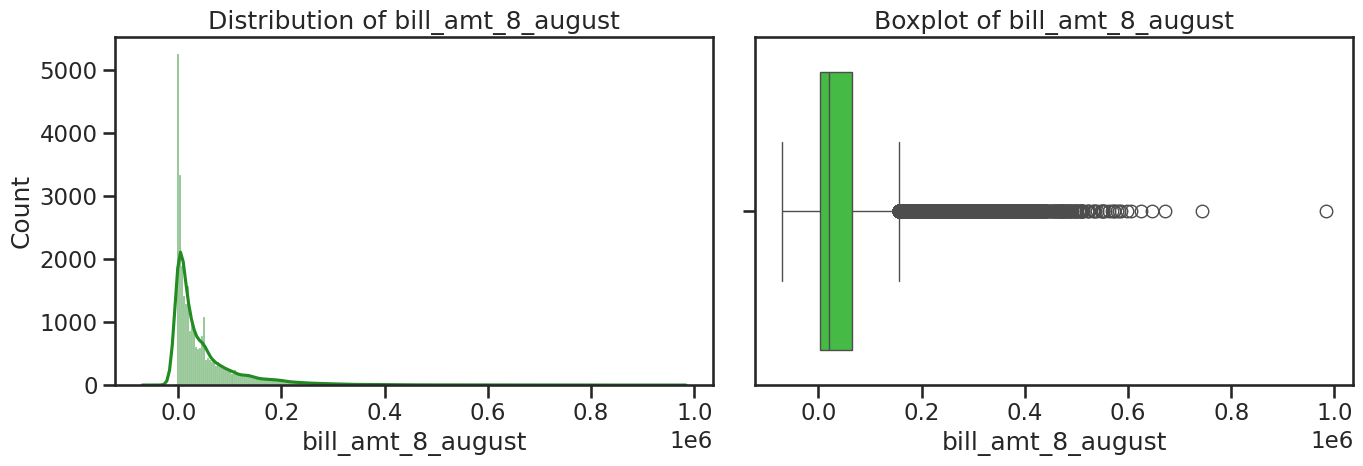

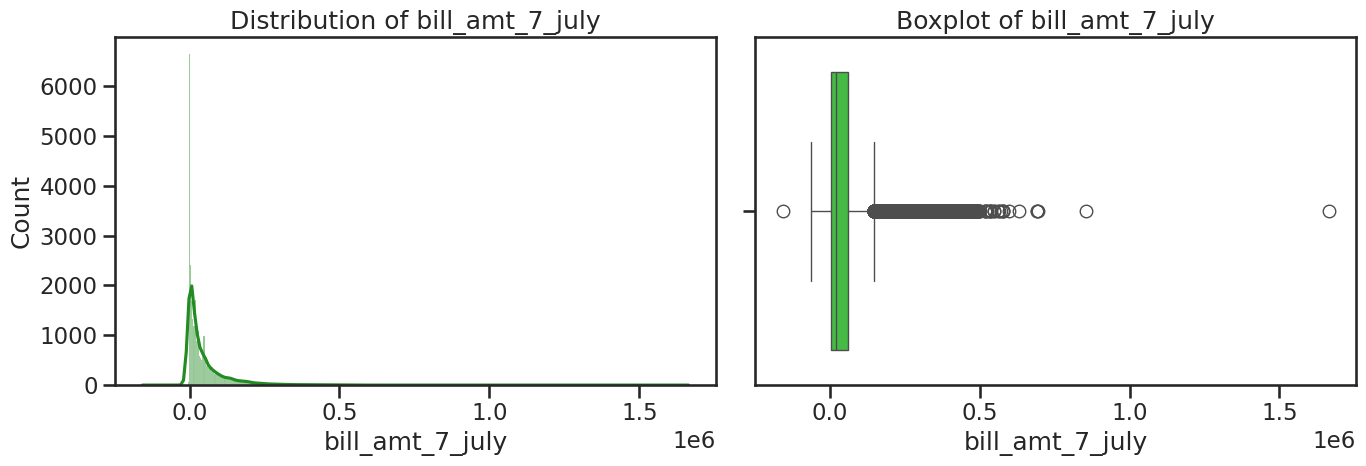

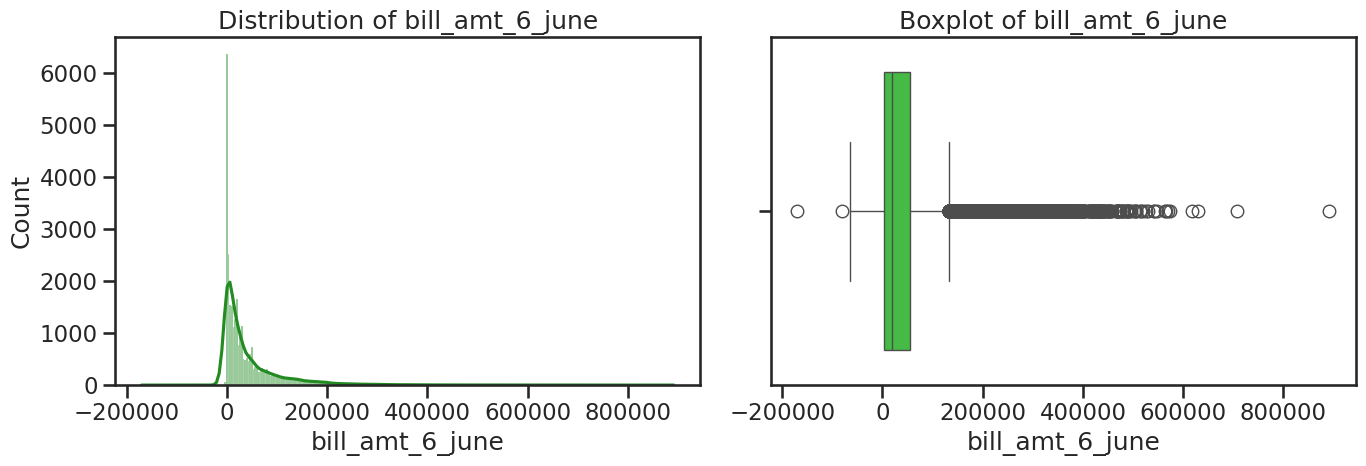

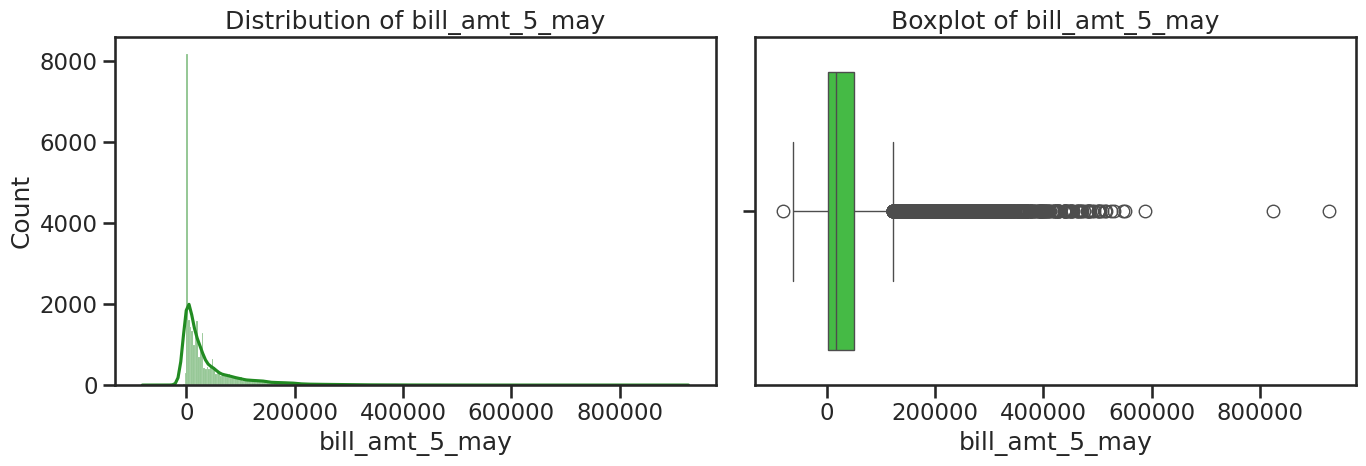

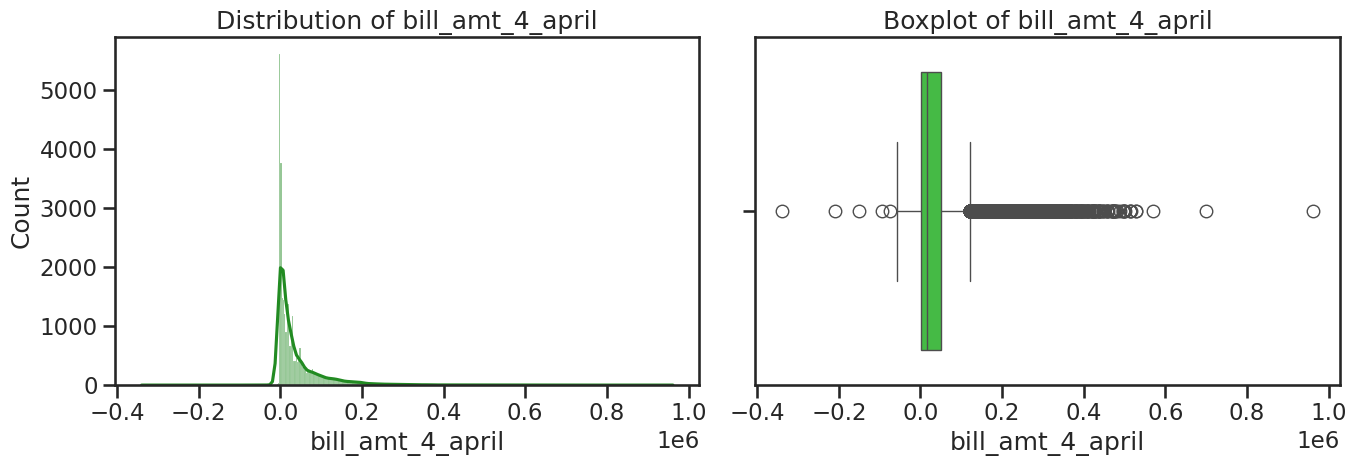

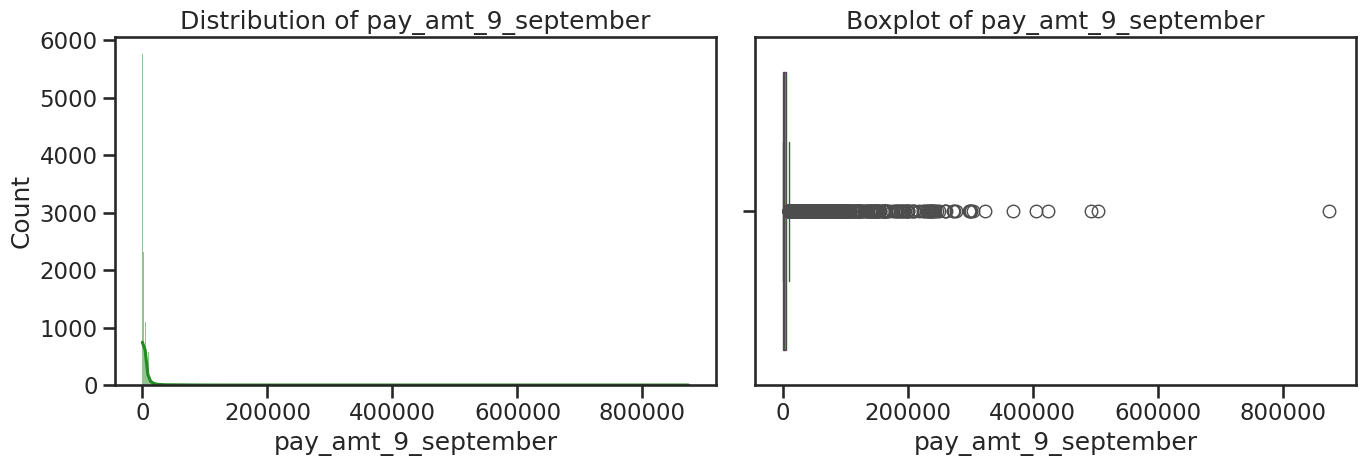

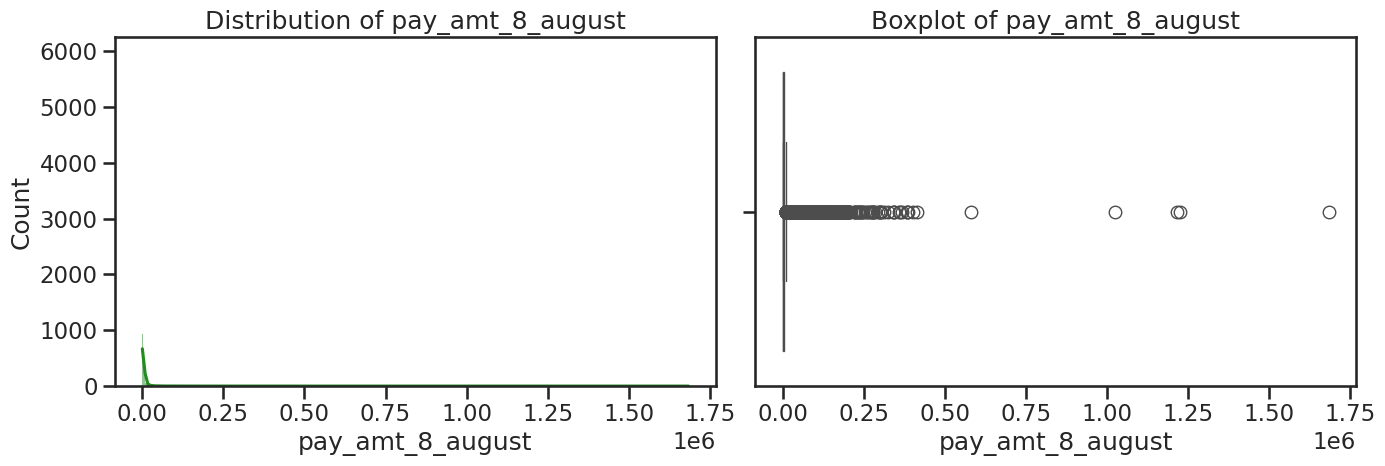

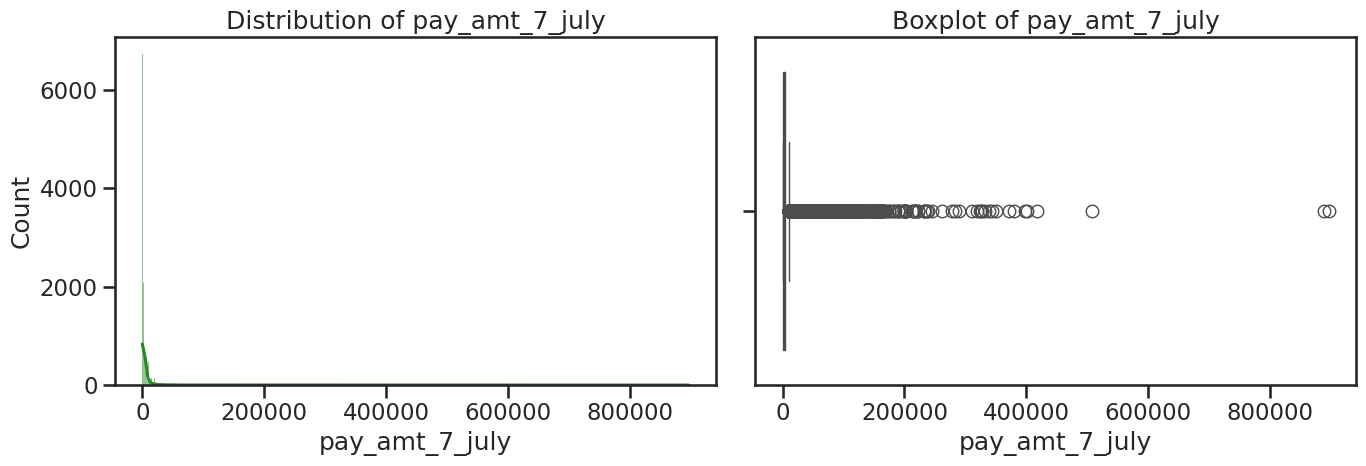

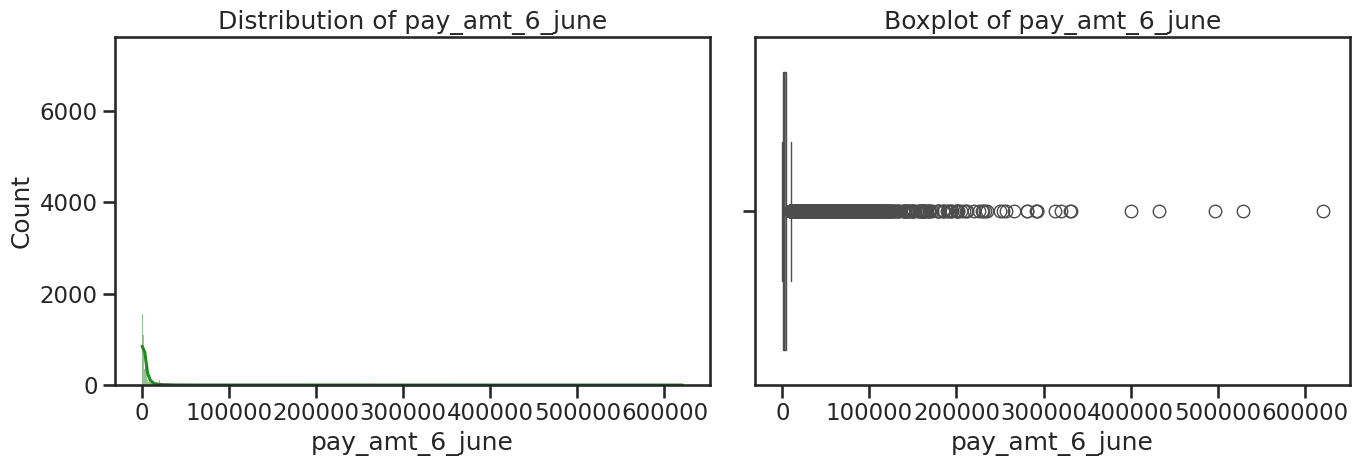

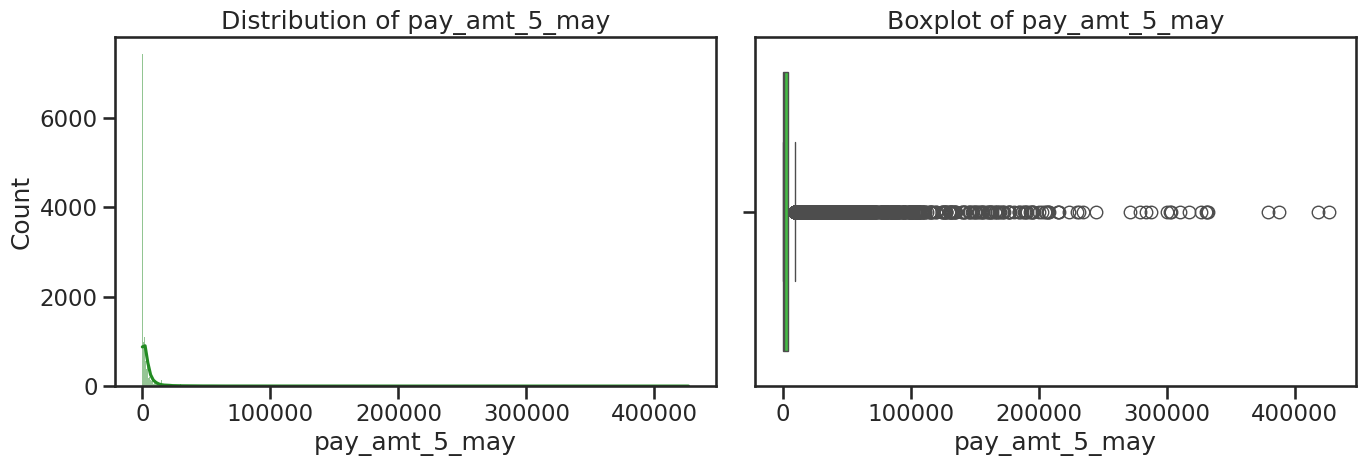

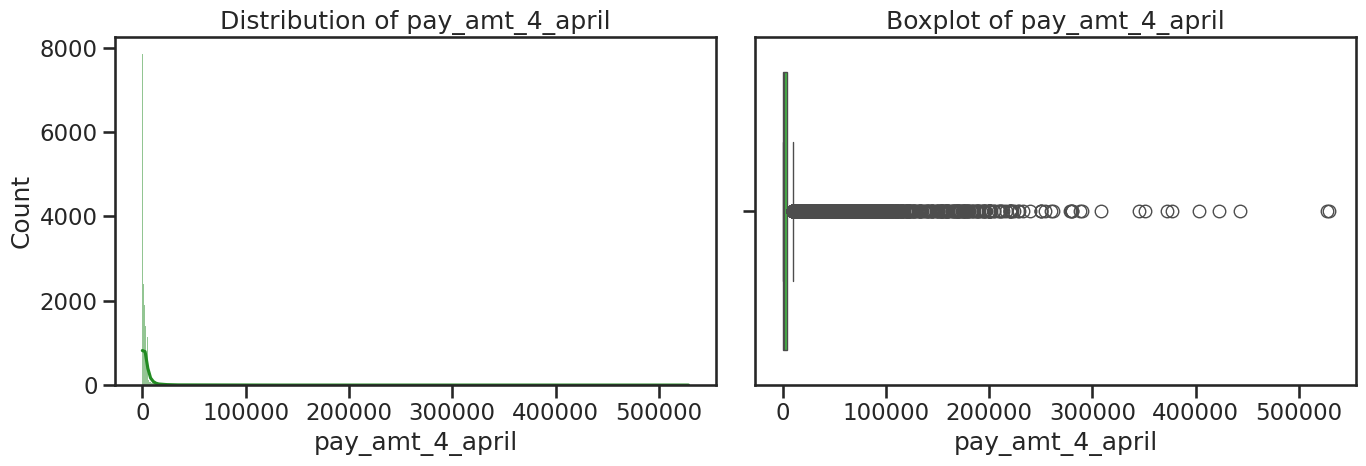

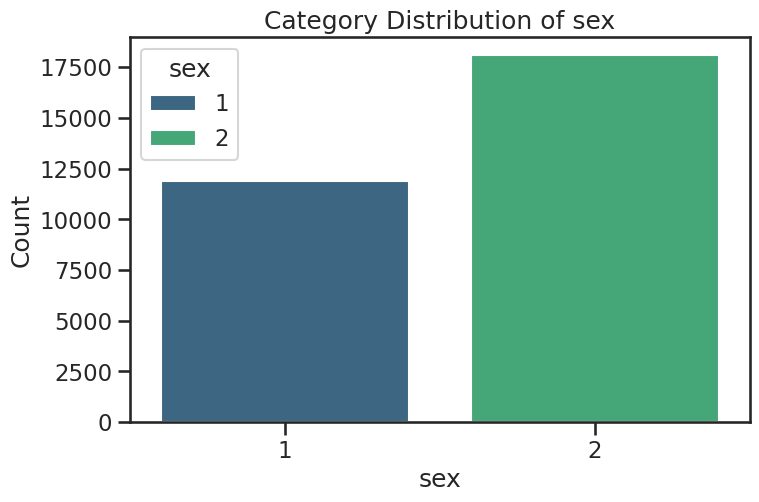

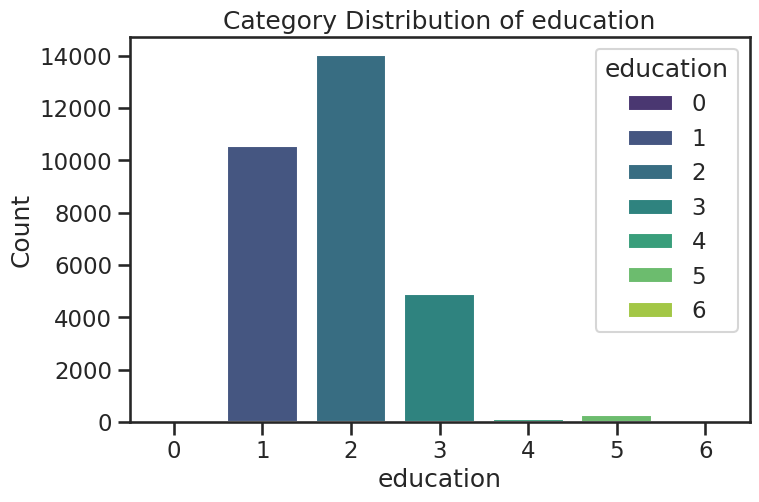

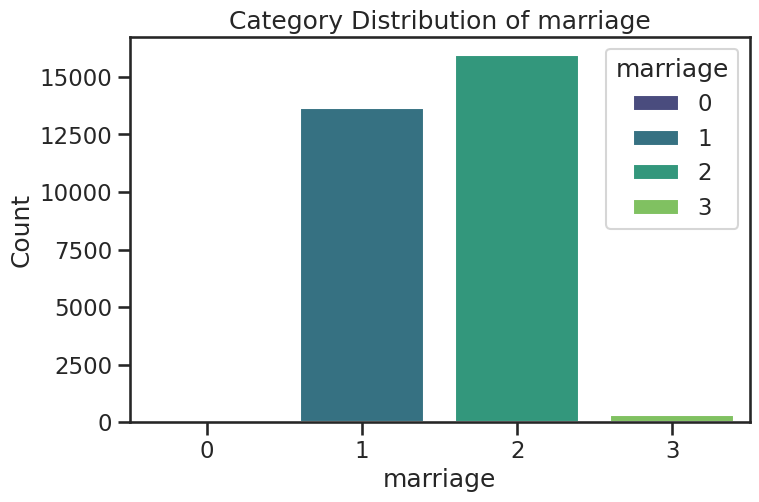

In [26]:
from eda_utils import data_overview, plot_class_distribution, plot_univariate_distributions

# Visualize the distributions
plot_univariate_distributions(X, categorical_columns)

#### EDA Utils

In [19]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()



'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Loan Data Utils

In [27]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

#--------   Load and Preprocess Data   --------#

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def rename_bill_and_payment_columns(df):
    # Define the new names for the bill_amt columns with month number and name
    bill_amt_new_names = {
        'bill_amt1': 'bill_amt_9_september',
        'bill_amt2': 'bill_amt_8_august',
        'bill_amt3': 'bill_amt_7_july',
        'bill_amt4': 'bill_amt_6_june',
        'bill_amt5': 'bill_amt_5_may',
        'bill_amt6': 'bill_amt_4_april'
    }

    # Define the new names for the pay_amt columns with month number and name
    pay_amt_new_names = {
        'pay_amt1': 'pay_amt_9_september',
        'pay_amt2': 'pay_amt_8_august',
        'pay_amt3': 'pay_amt_7_july',
        'pay_amt4': 'pay_amt_6_june',
        'pay_amt5': 'pay_amt_5_may',
        'pay_amt6': 'pay_amt_4_april'
    }

    # Rename the columns
    df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})

    return df

def reorder_bill_and_payment_columns(df):
    # Define the correct chronological order for the renamed bill_amt and pay_amt columns
    bill_columns_order = [
        'bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june',
        'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september'
    ]

    pay_columns_order = [
        'pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
        'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september'
    ]

    # Reorder the columns
    other_columns = [col for col in df.columns if col not in bill_columns_order + pay_columns_order]
    df = df[bill_columns_order + pay_columns_order + other_columns]

    return df

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_bill_and_payment_columns(df)
        df = reorder_bill_and_payment_columns(df)  # Reorder the bill_amt and pay_amt columns
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None





'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *

Script successfully written to loan_data_utils.py
